### Distribución Binomial
Un ensayo de Bernouilli se define como un experimento donde puede darse un éxito o fracaso y donde cada ensayo es independiente del anterior. Por ejemplo, un ensayo de Bernoulli de parámetro 0.5 sería lanzar una moneda a cara o cruz (mitad de posibilidades de cara, mitad de posibilidades de cruz).

Si repetimos N veces los ensayos de Bernouilli tenemos una distribución binomial.

### Problema
Un proveedor de DVDs regrabables afirma que solamente el 4 % de los
artículos suministrados son defectuosos. Si un cliente compra un lote de 25
DVDs, ¿cuál es el número esperado de DVDs defectuosos en el lote? Si el cliente encuentra que 4 de los DVDs comprados son defectuosos, ¿debe dudar de la afirmación del vendedor?
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html
* cdf(x) - Función de distribución F(X)
* sf(x) = 1 - cdf(x)
* pmf(x) - Función de probabilidad f(x) (distribuciones discretas)
* pdf(x) - Función de densidad f(x) (distribuciones continuas)
* ppf(x) - Función inversa a cdf(x). Nos permite obtener el valor correspondiente a una probabilidad.

In [72]:
import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt
X = ss.binom(25,0.04)
X.mean()

1.0

Es decir, de media habría 1 DVD defectuoso en el paquete. mean calcula la media de la distribución.
Para saber si hay que fiarse del vendedor vamos a calcular cuál era la probabilidad de que nos tocasen 4 DVDs defectuosos.

In [73]:
pr = X.sf(3)
pr

0.016521575032415876

Es decir, la probabilidad que ocurriese era del 1%. Podemos sospechar del fabricante. cdf calcula las probabilidades acumuladas. En este caso tenemos que calcular la probabilidad de que hubiese 4 o más fallos, Pr{X>=4}. Una manera fácil de calcularlo es hacer 1-Pr{X<4}. cdf(n) nos permite calcular probabilidades acumuladas hasta N. Otra opción sería simplemente obtener la probabilidad de 0 DVDs defectuosos, 1 DVD defectuoso, de 2 DVDs defectuosos, de 3 DVDs defectuosos, sumarlo y restarlo de 1.

In [74]:
sumatory = X.pmf(0) + X.pmf(1) + X.pmf(2) + X.pmf(3)
sumatory

0.9834784249675821

In [75]:
probability = 1 - sumatory
probability

0.016521575032417912

Otra forma de hacerlo

In [76]:
pr = 1 - sum(X.pmf(x) for x in range(4))
pr

0.016521575032417912

pmf(n) devuelve la probabilidad de que X=N, Pr{X=N} Esto solo tiene sentido en ciertas distribuciones, las discretas, como es el caso de la binomial.

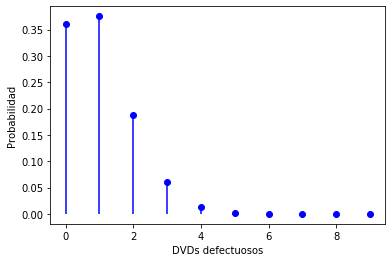

In [79]:
x = np.arange(10)

plt.plot(x,X.pmf(x),"bo")
plt.vlines(x,0,X.pmf(x),"b")
plt.xlabel('DVDs defectuosos')
plt.ylabel('Probabilidad')
plt.show()

En el gráfico también se puede ver que las probabilidades de tener 4 o más DVDs defectuosos son mínimas.